## Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

## Business Goal

we are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
#import libraries for both modelling & visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

In [2]:
#importing & reading dataset
df=pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#checking the shape
df.shape

(730, 16)

In [4]:
#inspecting the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [5]:
#inspecting the dataframe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Cleaning

In [6]:
# inspecting the column-wise null count

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#dropping instant column because it is just indexing
df.drop("instant",axis=1,inplace=True)

In [8]:
#dropping date column
df.drop("dteday",axis=1,inplace=True)

In [9]:
#dropping registred as casual because cnt is the sum of registered & casual
df.drop(["registered","casual"],axis=1,inplace=True)

In [10]:
# converting season column from numeric to categorical because it doesn't follow any order

def fun(x):
    if x==1:
        return("spring")
        
    elif x==2:
        return("summer")
 
    elif x==3:
        return("fall")
 
    else:
        return("winter")


df["Season"]=df.season.apply(fun)

In [11]:
df.drop("season",axis=1,inplace=True)

In [12]:
# converting weathersit column from numeric to categorical because it doesn't follow any order

def weather(x):
    if x==1:
        return("Clear")
        
    elif x==2:
        return("Cloud")
 
    elif x==3:
        return("Snow")
 
    else:
        return("Rain")


df["weather"]=df.weathersit.apply(weather)

In [13]:
df.drop("weathersit",axis=1,inplace=True)

In [14]:
#mapping the column mnth string
df["mnth"] = df["mnth"].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
                                   7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [15]:
df.mnth.value_counts()

Jul    62
May    62
Oct    62
Dec    62
Aug    62
Jan    62
Mar    62
Sep    60
Apr    60
Jun    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [16]:
#mapping the weekday mnth string
df["weekday"] = df["weekday"].map({1:'Mon', 2:'Tues', 3:'Wed', 4:'Thur', 5:'Fri', 6:'Sat', 
                                   0:'Sun'})

In [17]:
df.weekday.value_counts()

Tues    105
Mon     105
Wed     104
Sat     104
Thur    104
Fri     104
Sun     104
Name: weekday, dtype: int64

In [18]:
#mapping the yr mnth string
df["yr"] = df["yr"].map({1:2019, 0:2018})

In [19]:
#checking the dataset after data cleaning
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Season,weather
0,2018,Jan,0,Mon,1,14.110847,18.18125,80.5833,10.749882,985,spring,Cloud
1,2018,Jan,0,Tues,1,14.902598,17.68695,69.6087,16.652113,801,spring,Cloud
2,2018,Jan,0,Wed,1,8.050924,9.47025,43.7273,16.636703,1349,spring,Clear
3,2018,Jan,0,Thur,1,8.200000,10.60610,59.0435,10.739832,1562,spring,Clear
4,2018,Jan,0,Fri,1,9.305237,11.46350,43.6957,12.522300,1600,spring,Clear


## Visualisation

<Figure size 720x720 with 0 Axes>

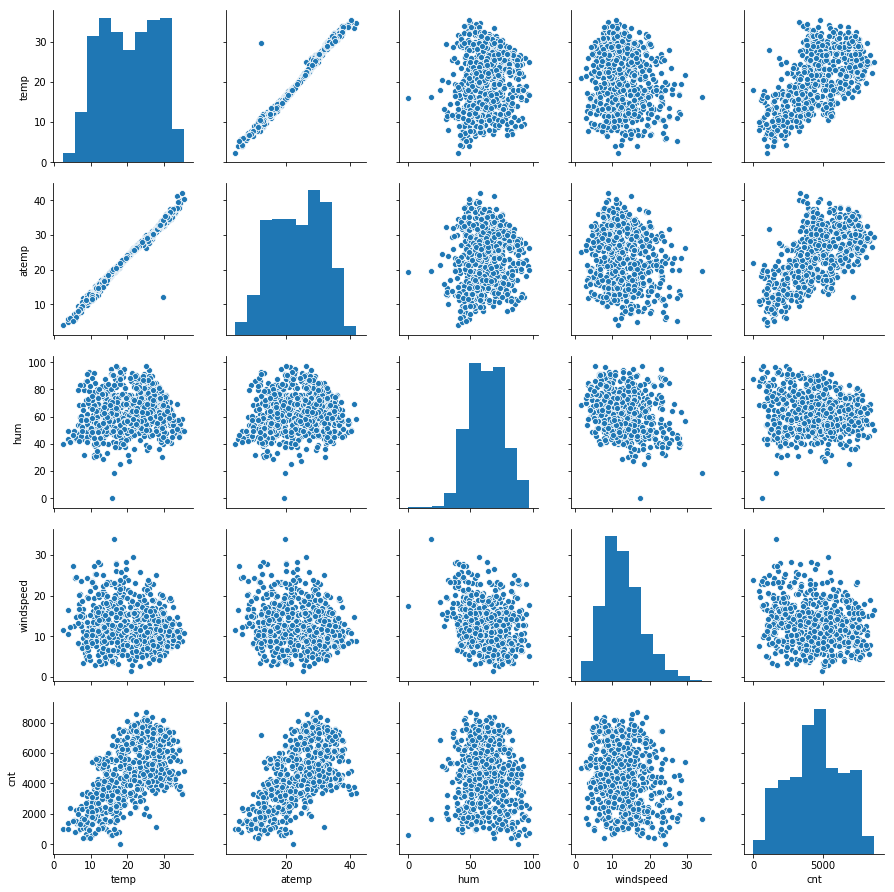

In [20]:
#plotting all numerical variables
var=["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(10,10))
sns.pairplot(df[var])

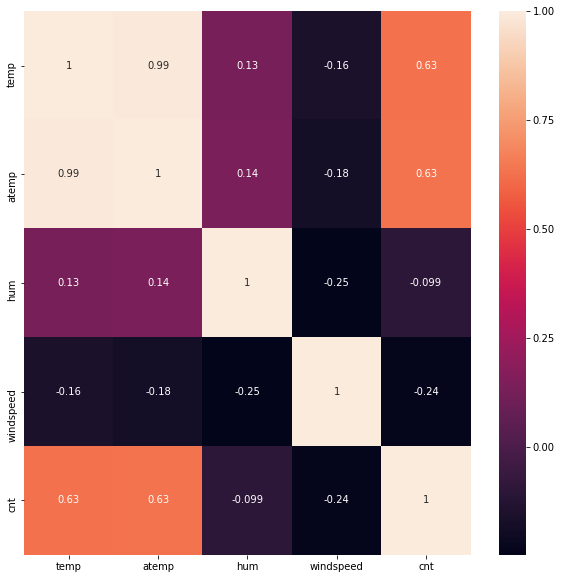

In [21]:
#plotting all numerical variables
var=["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(10,10))
sns.heatmap(df[var].corr(),annot=True)

## observation
we can observe there is a good linear relation between dependent variable & independent variables:

registered & cnt,

temp/atemp & cnt,

casual & cnt,


In [22]:
#plotting for categorial variables
#year,month,holiday,season,weather,weekday,workingday

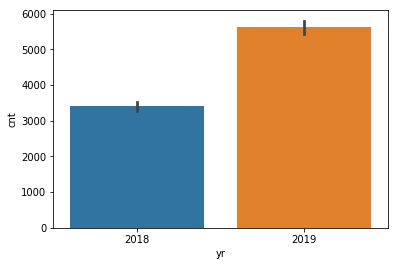

In [23]:
#checking insights between cnt & year
sns.barplot(df.yr,df.cnt)

From here we can say that more no. of cycles were rented in the year 2019

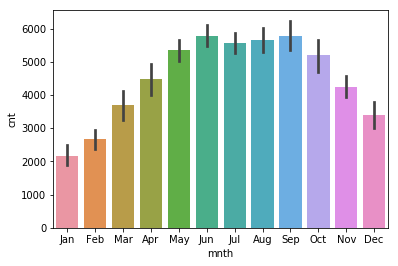

In [24]:
#checking insights between cnt & month
sns.barplot(df.mnth,df.cnt)

The bicycle renting is more popular in June, July, August and September.


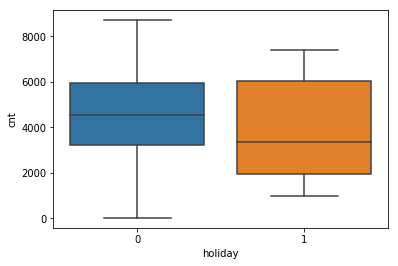

In [25]:
#checking insights between cnt & holiday
sns.boxplot(df.holiday,df.cnt)

During working days people rent more bicycle than on holidays.

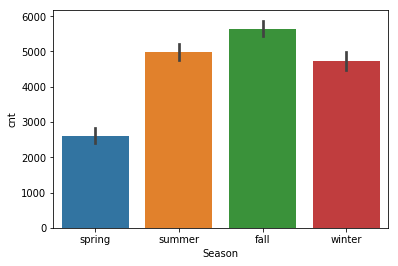

In [26]:
##checking insights between cnt & season
sns.barplot(df.Season,df.cnt)

During fall maximum number of bicycle were rented follwing summer and winter respectively.

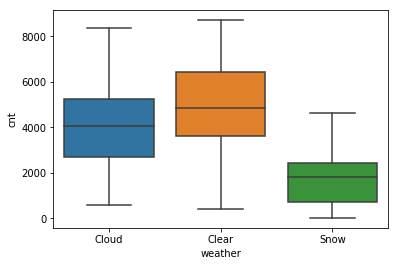

In [27]:
##checking insights between cnt & weather
sns.boxplot(df.weather,df.cnt)

Less people rented bicycle during snow.

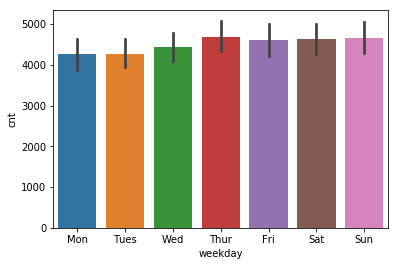

In [28]:
##checking insights between cnt & weather
sns.barplot(df.weekday,df.cnt)

it is observed that the demand is maximum on thurday to sunday

 ## Data pre-processing

1) creating dummy variables

2) Train test split

3) standardisation/ Normalisation

In [29]:
#creating dummy values for month column
month=pd.get_dummies(df.mnth, drop_first=True)
df=pd.concat([df,month],axis=1)
df.drop("mnth",axis=1,inplace=True)

In [30]:
#creating dummy values for weekday column
week=pd.get_dummies(df.weekday, drop_first=True)
df=pd.concat([df,week],axis=1)
df.drop("weekday",axis=1,inplace=True)

In [31]:
#creating dummy values for Season column
season=pd.get_dummies(df.Season, drop_first=True)
df=pd.concat([df,season],axis=1)
df.drop("Season",axis=1,inplace=True)

In [32]:
#creating dummy values for weather column
Weather=pd.get_dummies(df.weather, drop_first=True)
df=pd.concat([df,Weather],axis=1)
df.drop("weather",axis=1,inplace=True)

In [33]:
#creating dummy values for yr column
year=pd.get_dummies(df.yr, drop_first=True)
df=pd.concat([df,year],axis=1)
df.drop("yr",axis=1,inplace=True)

In [34]:
#renaming the coln from 2019 to year for better understanding
df.rename(columns = {2019:'year'}, inplace = True)

In [35]:
#checking the  dataset
df.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sun,Thur,Tues,Wed,spring,summer,winter,Cloud,Snow,year
0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [36]:
#train test splitting the data
train,test = train_test_split(df,random_state=100,test_size=0.3)

In [37]:
#Normalisation : will be using mix-max scaler
scaler = MinMaxScaler()

In [38]:
#normalizing the data
coln=["temp","atemp","hum","windspeed","cnt"]
train[coln]=scaler.fit_transform(train[coln])

In [39]:
#creating x & y column
y=train.pop('cnt')

In [40]:
# feature selection  using RFE
lm = LinearRegression()
lm.fit(train, y)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(train, y)

In [41]:
#list of all columns with ranking using rfe
list(zip(train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 15),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 5),
 ('Sun', False, 6),
 ('Thur', False, 14),
 ('Tues', False, 7),
 ('Wed', False, 11),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Cloud', True, 1),
 ('Snow', True, 1),
 ('year', True, 1)]

In [42]:
#creating final dataset
xtrain=train[train.columns[rfe.support_]]

In [43]:
#final traiing data
xtrain.head()

,holiday,temp,hum,windspeed,Dec,Jan,Jul,Nov,Sep,spring,summer,winter,Cloud,Snow,year
653,0,0.509887,0.575354,0.300794,0,0,0,0,0,0,0,1,0,0,1
576,0,0.815169,0.725633,0.264686,0,0,1,0,0,0,0,0,0,0,1
426,0,0.442393,0.640189,0.255342,0,0,0,0,0,1,0,0,1,0,1
728,0,0.245101,0.498067,0.663106,1,0,0,0,0,1,0,0,0,0,1
482,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,1,0,1,0,1


## Model Building

In [44]:
#creating model -1
x_sm=sm.add_constant(xtrain)
lr=sm.OLS(y,x_sm).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     180.1
Date:                Sun, 08 May 2022   Prob (F-statistic):          2.29e-189
Time:                        13:08:07   Log-Likelihood:                 514.84
No. Observations:                 511   AIC:                            -997.7
Df Residuals:                     495   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3206      0.036      8.882      0.000       0.250       0.392
holiday       -0.0912      0.026     -3.558      0.000      -0.142      -0.041
temp           0.4809      0.037     12.982      0.000       0.408       0.554
hum           -0.1628      0.038     -4.305      0.000      -0.237      -0.089
windspeed     -0.1888      0.026     -7.314      0.000      -0.240      -0.138
Dec           -0.0370      0.017     -2.117      0.035      -0.071      -0.003
Jan           -0.0437      0.018     -2.408      0.016      -0.079      -0.008
Jul           -0.0555      0.018     -3.039      0.002      -0.091      -0.020
Nov           -0.0408      0.019     -2.177      0.030      -0.078      -0.004
Sep            0.0749      0.017      4.434      0.000       0.042       0.108
spring        -0.0614      0.021     -2.888      0.004      -0.103      -0.020
summer         0.0421      0.015      2.742      0.006       0.012       0.072
winter         0.1037      0.018      5.767      0.000       0.068       0.139
Cloud         -0.0546      0.010     -5.223      0.000      -0.075      -0.034
Snow          -0.2471      0.026     -9.351      0.000      -0.299      -0.195
year           0.2308      0.008     28.543      0.000       0.215       0.247
==============================================================================
Omnibus:                       67.308   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.984
Skew:                          -0.686   Prob(JB):                     4.06e-36
Kurtosis:                       5.402   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#checking VIF values
vif = pd.DataFrame()
X = x_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.64
10,spring,5.27
2,temp,4.42
12,winter,3.83
11,summer,2.77
3,hum,1.92
8,Nov,1.76
6,Jan,1.68
13,Cloud,1.57
5,Dec,1.49


since the VIF value of spring is more than 5 so will drop spring variable

In [46]:
#dropping spring variable
xtrain.drop("spring",axis=1,inplace=True)

In [47]:
#creating model -2
x_sm=sm.add_constant(xtrain)
lr1=sm.OLS(y,x_sm).fit()

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.00e-188
Time:                        13:08:15   Log-Likelihood:                 510.57
No. Observations:                 511   AIC:                            -991.1
Df Residuals:                     496   BIC:                            -927.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2570      0.029      8.923      0.000       0.200       0.314
holiday       -0.0947      0.026     -3.671      0.000      -0.145      -0.044
temp           0.5546      0.027     20.500      0.000       0.501       0.608
hum           -0.1748      0.038     -4.616      0.000      -0.249      -0.100
windspeed     -0.1973      0.026     -7.634      0.000      -0.248      -0.146
Dec           -0.0310      0.017     -1.774      0.077      -0.065       0.003
Jan           -0.0475      0.018     -2.606      0.009      -0.083      -0.012
Jul           -0.0454      0.018     -2.517      0.012      -0.081      -0.010
Nov           -0.0310      0.019     -1.668      0.096      -0.067       0.006
Sep            0.0898      0.016      5.539      0.000       0.058       0.122
summer         0.0728      0.011      6.527      0.000       0.051       0.095
winter         0.1388      0.013     10.402      0.000       0.113       0.165
Cloud         -0.0518      0.010     -4.935      0.000      -0.072      -0.031
Snow          -0.2409      0.027     -9.078      0.000      -0.293      -0.189
year           0.2294      0.008     28.214      0.000       0.213       0.245
==============================================================================
Omnibus:                       58.925   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.854
Skew:                          -0.653   Prob(JB):                     2.10e-27
Kurtosis:                       5.015   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#checking vif value
vif = pd.DataFrame()
X = x_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.84
2,temp,2.32
11,winter,2.08
3,hum,1.90
8,Nov,1.70
6,Jan,1.67
12,Cloud,1.55
5,Dec,1.47
10,summer,1.44
7,Jul,1.43


p value of Nov is greater than 0.05 so will drop

In [49]:
#dropping Dec column
xtrain.drop("Nov",axis=1,inplace=True)

In [50]:
#creating model-3
x_sm=sm.add_constant(xtrain)
lr2=sm.OLS(y,x_sm).fit()

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.2
Date:                Sun, 08 May 2022   Prob (F-statistic):          2.74e-189
Time:                        13:08:35   Log-Likelihood:                 509.14
No. Observations:                 511   AIC:                            -990.3
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2506      0.029      8.763      0.000       0.194       0.307
holiday       -0.0996      0.026     -3.879      0.000      -0.150      -0.049
temp           0.5626      0.027     21.096      0.000       0.510       0.615
hum           -0.1743      0.038     -4.594      0.000      -0.249      -0.100
windspeed     -0.1972      0.026     -7.618      0.000      -0.248      -0.146
Dec           -0.0200      0.016     -1.231      0.219      -0.052       0.012
Jan           -0.0431      0.018     -2.386      0.017      -0.079      -0.008
Jul           -0.0464      0.018     -2.569      0.010      -0.082      -0.011
Sep            0.0927      0.016      5.735      0.000       0.061       0.124
summer         0.0739      0.011      6.634      0.000       0.052       0.096
winter         0.1276      0.012     11.054      0.000       0.105       0.150
Cloud         -0.0514      0.011     -4.891      0.000      -0.072      -0.031
Snow          -0.2382      0.027     -8.978      0.000      -0.290      -0.186
year           0.2295      0.008     28.168      0.000       0.213       0.245
==============================================================================
Omnibus:                       55.443   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.508
Skew:                          -0.627   Prob(JB):                     3.71e-25
Kurtosis:                       4.926   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#checking VIF values
vif = pd.DataFrame()
X = x_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,50.91
2,temp,2.25
3,hum,1.90
6,Jan,1.63
10,winter,1.55
11,Cloud,1.55
9,summer,1.44
7,Jul,1.43
5,Dec,1.26
12,Snow,1.25


p value of Dec is greater than 0.05 so will drop

In [52]:
#dropping Nov column
xtrain.drop("Dec",axis=1,inplace=True)

In [53]:
#creating model -4
x_sm=sm.add_constant(xtrain)
lr3=sm.OLS(y,x_sm).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.8
Date:                Sun, 08 May 2022   Prob (F-statistic):          3.84e-190
Time:                        13:09:00   Log-Likelihood:                 508.36
No. Observations:                 511   AIC:                            -990.7
Df Residuals:                     498   BIC:                            -935.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2451      0.028      8.672      0.000       0.190       0.301
holiday       -0.0985      0.026     -3.837      0.000      -0.149      -0.048
temp           0.5722      0.026     22.408      0.000       0.522       0.622
hum           -0.1788      0.038     -4.734      0.000      -0.253      -0.105
windspeed     -0.1948      0.026     -7.543      0.000      -0.246      -0.144
Jan           -0.0380      0.018     -2.160      0.031      -0.073      -0.003
Jul           -0.0471      0.018     -2.608      0.009      -0.083      -0.012
Sep            0.0941      0.016      5.836      0.000       0.062       0.126
summer         0.0756      0.011      6.831      0.000       0.054       0.097
winter         0.1260      0.011     10.980      0.000       0.103       0.149
Cloud         -0.0507      0.010     -4.828      0.000      -0.071      -0.030
Snow          -0.2353      0.026     -8.900      0.000      -0.287      -0.183
year           0.2294      0.008     28.146      0.000       0.213       0.245
==============================================================================
Omnibus:                       53.561   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.354
Skew:                          -0.612   Prob(JB):                     4.88e-24
Kurtosis:                       4.882   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#checking vif
vif = pd.DataFrame()
X = x_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.68
2,temp,2.06
3,hum,1.88
5,Jan,1.55
10,Cloud,1.55
9,winter,1.53
6,Jul,1.43
8,summer,1.42
11,Snow,1.24
4,windspeed,1.19


## We observe than all the pvalues are less than 0.05 and VIF values less than 5 so lr3 is our final model

## Validating linear regression assumptions

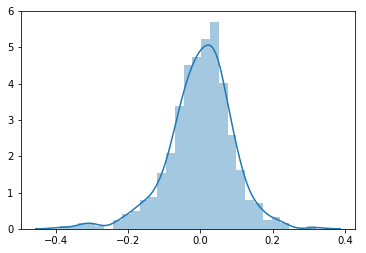

In [55]:
# to check if the error terms are normally distributed or not

y_train_pred = lr3.predict(x_sm)
res = y- y_train_pred
sns.distplot(res)

The error terms are normally distributed with mean 0.

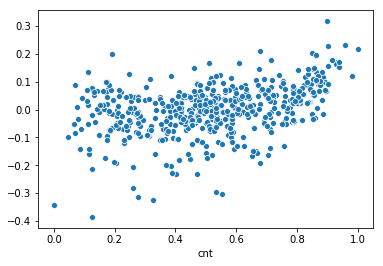

In [56]:
# checking if the error terms follow any pattern or not

sns.scatterplot(y,res)

The error terms are independent of each other and do not follow any visible pattern.

## Predictions

In [57]:
test.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sun,Thur,Tues,Wed,spring,summer,winter,Cloud,Snow,year
184,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,1,0,0,0,1,0,0
535,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,0,...,0,1,0,0,0,1,0,0,0,1
299,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,0,...,0,0,0,0,0,0,1,1,0,0
221,0,1,31.433347,34.24915,42.4167,13.417286,4780,1,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [58]:
# transformng the test dataset
coln=["temp","atemp","hum","windspeed","cnt"]
test[coln]=scaler.transform(test[coln])

In [59]:
# creating y test
y_test=test.pop('cnt')

In [60]:
# adding constant to x test 
x_sm_test=sm.add_constant(test)

In [61]:
# removing columns which are not present in model 
x_sm_test=x_sm_test[x_sm.columns]

In [62]:
# predicting the value of y 
y_lm=lr3.predict(x_sm_test)

In [63]:
# checking r2 score for training set
r2_score(y, y_train_pred)

0.8411730343903825

In [64]:
# checking r2 score for test set
r2_score(y_test, y_lm)

0.8029710161370777

#### cnt = 0.2451 - 0.0985 X holiday + 0.5722 X temp - 0.1788 X hum - 0.1948 X windspeed - 0.0348 X Jan - 0.0471 X Jul + 0.0941 X Sep + 0.0756 X Summer + 0.1260 X Winter - 0.0507 X Cloud - 0.2353 X Snow + 0.2294 X year 

year: Since these bike-renting is slowly gaining popularity, with time the company will experience benefits once the situation becomes normal.

season: Bike renting is more popular in summer season and winter season.

weather: The users prefer to rent a bike when the weather is either clear or cloudy.

temp: The users prefer to ride or rent a bike when the temperature is moderate.

month:company should more focus in the month of september

holiday: there is a huge variation in the demand of bikes during holidays so bikes are rented more during working days